<a href="https://colab.research.google.com/github/Poommyy/geodatasci/blob/master/VisualizationInPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization in Python

By Garavig Tanaksaranond

Department of Survey Engineering, Chulalongkorn University

## Introduction

library พื้นฐานสำหรับการ plot คือ Matplotlib

แต่ตัว Matplotlib เองมีฟังก์ชันพื้นฐานเท่านั้น ทำให้ใช้งานค่อนข้างยาก จึงมี library อื่น ๆ พัฒนาขึ้นมาจาก Matplotlib โดยสร้างขึ้นจาก Matplotlib

ในส่วนนี้จะใช้ library seaborn ซึ่งออกแบบตาม Semiology of Graphics (Bertin,1967)ซึ่งเป็นการมองแต่ละองค์ประกอบของกราฟ หรือ visual variables เป็นตัวแปรที่สามารถนำข้อมูลมาผูกได้ ทำให้ใช้งานง่ายกว่า Matplotlib (และสวยกว่า)

ตัวอย่างเช่น ในกรณีที่จะ plot เส้นหลาย ๆ เส้นที่แบ่งตามข้อมูล ใน Matplotlib จะต้องแยกข้อมูลแต่ละเส้นให้เป็นแต่ละคอลัมน์ แล้วถึงจะสั่ง plot

แต่ seaborn จะนำเข้าข้อมูลเป็น long format ได้เลยและสามารถกำหนดว่า สีจะให้แบ่งตามข้อมูลในคอลัมน์ใดทันที โดยสีจะเลือกมาตาม palette หรือจานสี ที่กำหนดเอาไว้

เพื่อให้เห็นความแตกต่างระหว่าง Matplotlib กับ Seaborn ในส่วนนี้จะทำการสร้างข้อมูลตัวอย่างง่าย ๆ ขึ้นมา แล้วลอง plot กราฟเส้น โดยใช้ทั้งสอง library



In [1]:
# matplotlib มีอยู่ใน Google Colab เรียบร้อยแล้ว จึงไม่ต้องทำการ install สามารถเรียกใช้ได้เลย
import matplotlib as mp
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#ข้อมูลสมมติ
d = {'sensorname': ['a','a','a','b','b','b','c','c','c','d','d','d'],'day': [1,2,3,1,2,3,1,2,3,1,2,3], 'value': [36.85, 43.5,25.1,24.1,12.3,26.4,12.5,25.6,54.2,14.2,12.2,14.7]}
df = pd.DataFrame(data=d)
df

,sensorname,day,value
0,a,1,36.85
1,a,2,43.50
2,a,3,25.10
3,b,1,24.10
4,b,2,12.30
5,b,3,26.40
6,c,1,12.50
7,c,2,25.60
8,c,3,54.20
9,d,1,14.20


sensorname      a     b     c     d
day                                
1           36.85  24.1  12.5  14.2
2           43.50  12.3  25.6  12.2
3           25.10  26.4  54.2  14.7


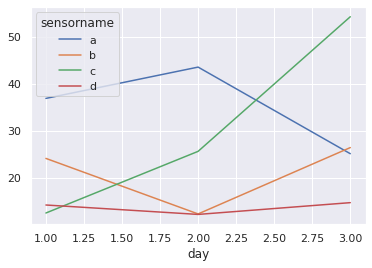

In [6]:
#ใช้ Matplotlib โดยเนื่องจากข้อมูลเราเป็น pandas dataframe เราจึงเรียก Matplotlib ผ่าน pandas ได้เลย
#ต้องแยกข้อมูลแต่ละ sensor เป็นคอลัมน์โดยใช้คำสั่ง pivot ก่อนถึงจะแสดงแยกเส้นกันได้
pivot = df.pivot(index='day', columns='sensorname', values='value')
print(pivot)  
pivot.plot()

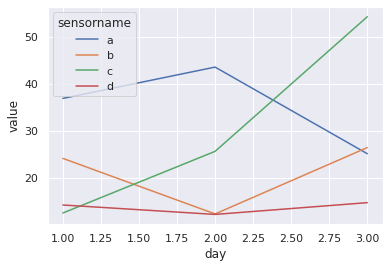

In [7]:
# seaborn ก็อยู่ใน google colab แล้ว สามารถ install ได้เลย 
import seaborn as sb
sb.set_theme()
sb.lineplot(x='day',y='value',hue='sensorname',data=df)

## Seaborn

seaborn จะมี plot ต่างๆ ดังต่อไปนี้

plot สำหรับข้อมูลเชิงปริมาณ
* relplot(relative plot) เป็นการ plot ที่แสดงความสัมพันธ์ระหว่าง 2 ตัวแปร (ที่เป็นเชิงปริมาณทั้งคู่) อันได้แก่
 * scatter plot เป็น default
 * line plot กำหนดได้ด้วยพารามิเตอร์ kind="line"
* displot(distribution plot) เป็นการ plot ดูการกระจายของข้อมูลเชิงปริมาณ
 * displot
 * kdeplot
 * ecdfplot
 * rugplot

 และ plot สำหรับข้อมูลเชิงคุณภาพ สามารถเรียก catplot() แล้วเรียกชนิดย่อยด้วยพารามิเตอร์ kind แบ่งออกเป็นประเภทย่อยดังต่อไปนี้
 
* Categorical scatterplots แสดงข้อมูลแบบจุด:

 * stripplot() (with kind="strip"; the default)

 * swarmplot() (with kind="swarm")

* Categorical distribution แสดงการกระจายข้อมูลเชิงปริมาณ แบ่งกลุ่มตามข้อมูลเชิงคุณภาพ:

 * boxplot() (with kind="box")

 * violinplot() (with kind="violin")

 * boxenplot() (with kind="boxen")

* Categorical estimate plots แสดงจำนวนนับของข้อมูลเชิงคุณภาพ:

 * pointplot() (with kind="point")

 * barplot() (with kind="bar")

 * countplot() (with kind="count")

### ใช้ seaborn กับข้อมูลจริง

ข้อมูลจริงที่จะนำมาใช้ในที่นี้เป็นข้อมูลรายชั่วโมงของ PM2.5 ที่ได้จากเซ็นเซอร์ที่ติดตั้งอยู่ที่ตำแหน่งต่าง ๆ ในประเทศไทย

เนื่องจากข้อมูลที่โหลดมาเป็นข้อมูลดิบ มีความผิดพลาดหลาย ๆ อย่าง ดังนั้น ก่อนที่จะ plot จะทำการ clean ข้อมูลก่อนตามโค้ดด้านล่าง

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/AirQualityData2019/master/pm25_2019_h.csv',sep=';')

In [ ]:
data = data[data['Series']!='mqttdata.mean {sensorid: }']
data = data[~data.Value.isnull()] #remove null value
data.Series = data.Series.str.replace('mqttdata.mean {sensorid: ','') 
data.Series = data.Series.str.replace('}','')
splitresult = data.Series.str.rsplit("/", expand=True)
data['Group'] = splitresult[0]
data['Series'] = splitresult[1]
data = data[~data.Group.isnull()] 
data = data[~data.Series.isnull()] #remove rows if there is no sensor id
data = data[data.Series!='undefined']
data.reset_index(inplace=True)
data.drop(columns='index',inplace=True) #ลบ column index ที่เกินมาออก

<ipython-input-6-ec196cfe0384>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Series = data.Series.str.replace('mqttdata.mean {sensorid: ','')
<ipython-input-6-ec196cfe0384>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Series = data.Series.str.replace('}','')


ข้อมูลที่ถูก clean เรียบร้อยจะมีหน้าตาเป็นแบบนี้

In [ ]:
data.head(5)

,Series,Time,h,Value,Group
0,MCTH001,2019-04-01,7,550.208333,NDTH
1,MCTH001,2019-04-01,8,675.833333,NDTH
2,MCTH001,2019-04-01,9,799.166667,NDTH
3,MCTH001,2019-04-01,10,819.791667,NDTH
4,MCTH001,2019-04-01,11,637.916667,NDTH


### ปรับให้ใช้ภาษาไทยได้

ใช้คำสั่ง GNU wget เป็นตัวเรียกไฟล์มาจาก gihub ที่มีคนนำ font ชื่อ th sarabun new ไปใส่เอาไว้

ในการเรียกใช้คำสั่ง wget เราจะใช้ ! นำหน้า ซึ่งจะเป็นการรันคำสั่งใน command prompt

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf?raw=true

In [ ]:
mp.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf?raw=true')
mp.rc('font',family='TH Sarabun New',size=12)

### Relplot

การ plot โดยไม่ได้ระบุอะไรเลยจะเป็นการ plot กราฟเส้น โดยตัวแปรแรกคือแปน x และตัวแปรตัวที่สองคือแกน y

เราจะทำการแสดงข้อมูลเฉลี่ยรายวันเป็นกราฟ แต่เนื่องจากข้อมูลตัวอย่างเป็นข้อมูลรายชั่วโมง จึงจะทำการหาค่าเฉลี่ยรายวันก่อนแล้วจึงจะทำการ plot

In [ ]:
#ถ้าไม่ใส่ as_index = False จะเป็น format ที่ไม่เป็น long format เอาไปใช้ต่อไม่ได้
aggdata = data.groupby(by=['Group','Series','Time'], as_index=False )['Value'].mean()

In [ ]:
aggdata

,Group,Series,Time,Value
0,NDTH,MCTH001,2019-04-01,342.904412
1,NDTH,MCTH001,2019-04-02,379.387153
2,NDTH,MCTH001,2019-04-03,329.586727
3,NDTH,MCTH001,2019-04-04,338.022412
4,NDTH,MCTH001,2019-04-05,331.085069
...,...,...,...,...
5581,nansensor,CU-S0102,2019-04-23,55.095486
5582,nansensor,CU-S0102,2019-04-24,66.245833
5583,nansensor,CU-S0102,2019-04-25,91.927500
5584,nansensor,CU-S0102,2019-05-03,74.620256


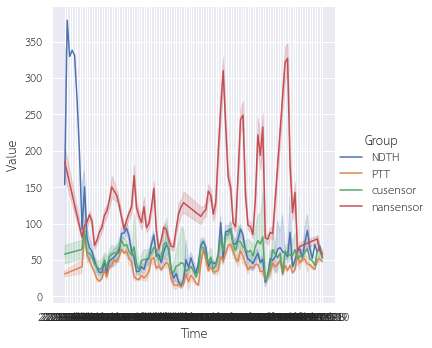

In [ ]:
sb.relplot(x='Time',y='Value', hue='Group',data=aggdata, kind='line')

### Displot

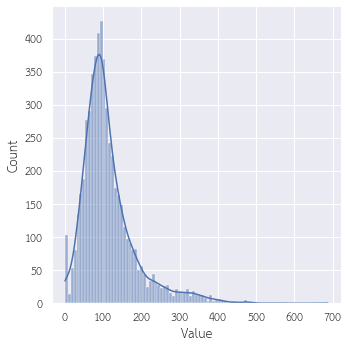

In [ ]:
# Histogram
sb.displot(x='Value',data=aggdata,kde=True)


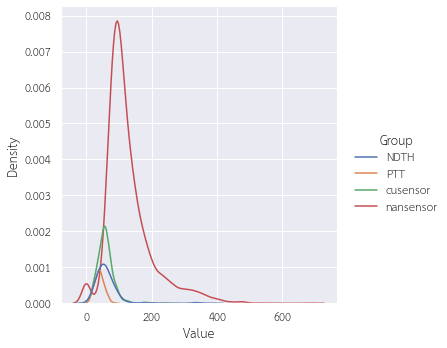

In [ ]:
# KDE
sb.displot(x='Value',data=aggdata,hue='Group',kind='kde')

#### Strip plot และ Swarm plot

จะใช้ Strip plot และ Swarm plot ในการดูว่าข้อมูลฝุ่นเฉลี่ยรายวันในแต่ละวันมีการกระจายตัวแตกต่างกันหรือไม่

เราจะเริ่มจากการนำข้อมูลที่เป็นค่าเฉลี่ยรายวันแล้วมาทำการแปลงให้เป็นวัน (จันทร์ อังคาร พุธ...)

จากนั้นแสดงข้อมูลแยกรายวันด้วย Strip plot

ส่วน Swarm plot จะเลือกข้อมูลมาแค่ 1 กลุ่มมาแสดง เนื่องจาก Swarm plot ไม่สามารถแสดงข้อมูลปริมาณมากได้

แนะนำให้ดู: https://www.youtube.com/watch?v=5e9NBhGBVwk

In [ ]:
aggdata.dtypes

Group      object
Series     object
Time       object
Value     float64
dtype: object

In [ ]:
aggdata['Time'] = pd.to_datetime(aggdata['Time'])

In [ ]:
aggdata['weekday'] = aggdata['Time'].dt.weekday

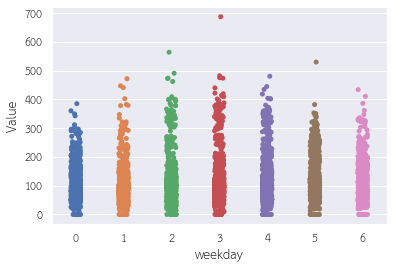

In [ ]:
sb.stripplot(x="weekday", y="Value", data=aggdata)

ข้อมูลปริมาณมากไม่สามารถใช้ swarmplot ได้ จึงทำการกรองข้อมูลเซ็นเซอร์มาเพียงบางส่วน

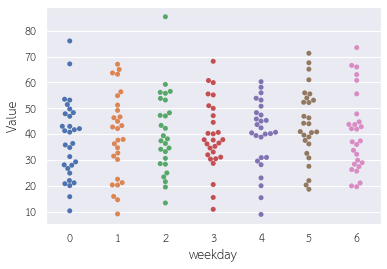

In [ ]:
sb.swarmplot(x="weekday", y="Value", data=aggdata[aggdata['Group']=='PTT'])

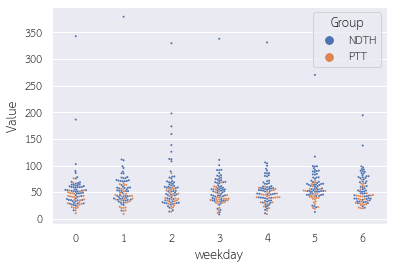

In [ ]:
sb.swarmplot(x="weekday", y="Value",s=2,hue='Group', data=aggdata[(aggdata['Group']=='PTT') | (aggdata['Group']=='NDTH')])

#### Boxplot & Violin plot

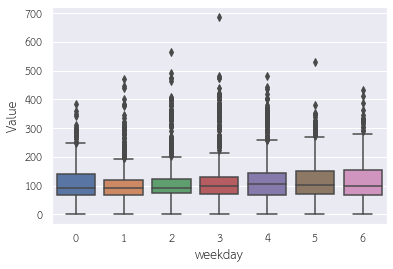

In [ ]:
sb.boxplot(x="weekday", y="Value", data=aggdata)

##### Errorbar

Errorbar มีให้เลือก 4 แบบ


1.   sd standard deviation แสดง +/- 1 standard deviation
2.   se standard error
3.   pi percentile interval แสดงความกว้างของ percentile ที่กำหนด
4.   ci confidence interval


https://seaborn.pydata.org/tutorial/error_bars.html

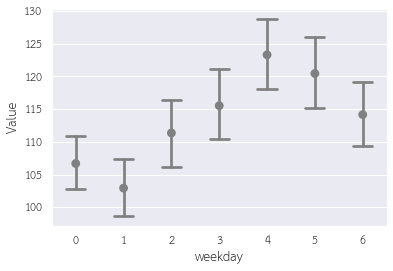

In [ ]:
sb.pointplot(
    data=aggdata, x="weekday", y="Value",
    errorbar=("pi", 100), capsize=.4, join=False, color=".5",
)

## Heatmap

In [ ]:
pivotweekday = aggdata.pivot_table(index='Group',columns='weekday',values='Value', aggfunc='mean')

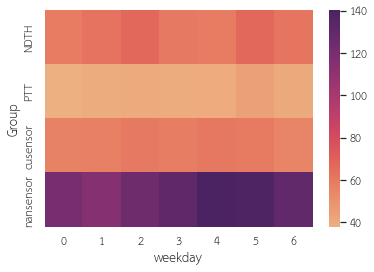

In [ ]:
sb.heatmap(pivotweekday,cmap=sb.color_palette("flare", as_cmap=True))

สีทั้งหมดที่มีให้เลือก https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=colormap

## Altair

Altair เป็นอีก library หนึ่งที่น่าสนใจ เนื่องจากสามารถ export ออกไปเป็น Vega หรือ Vega lite ได้

Vega เป็น javascript library ที่พัฒนามาจาก D3.js

เมื่อ export ออกมาแล้วจะสามารถนำ code ไปใส่ใน HTML เพื่อเผยแพร่ได้

หลักการของ Altair
1. นำข้อมูลเข้าไปใน object Chart
2. กำหนด mark (กำหนดว่าจะเอากราฟแบบไหน) สามารถดู mark ได้ที่ https://altair-viz.github.io/user_guide/marks.html
3. encode ข้อมูลเข้าไปเป็น แกนแต่ละแกน สี และส่วนประกอบอื่นๆ
4. ใส่ฟังก์ชัน interactive เข้าไป

In [ ]:
import altair as alt
alt.Chart(aggdata[aggdata['Group']=='PTT']).mark_circle().encode(
    x='Time',
    y='Value',
    color='weekday',
    tooltip=['Series', 'Value']
).interactive()

alt.Chart(...)

In [ ]:
brush = alt.selection(type='interval')
alt.Chart(aggdata[aggdata['Group']=='PTT']).mark_circle().encode(
    x='Time',
    y='Value',
    color=alt.condition(brush, 'weekday:O', alt.value('grey')),
).add_selection(brush)

alt.Chart(...)